In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
trash_pickup=pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [3]:
trash_pickup.head(2)


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470


In [4]:
trash_pickup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [5]:
type(trash_pickup)

pandas.core.frame.DataFrame

In [6]:
#Rename column names
trash_pickup=trash_pickup.rename(columns={'Request Number':'request_number', 'Date Opened':'date_opened', 'Request':'request', 'Description':'description',
                             'Incident Address':'incident_address', 'Zip Code':'zip_code', 'Trash Hauler':'trash_hauler', 'Trash Route':'trash_route',
                             'Council District':'council_district', 'State Plan X':'state_plan_x', 'State Plan Y':'state_plan_y',
                             'LONGITUDE':'longitude', 'LATITUDE':'latitude'})

In [7]:
trash_pickup.head(2)

,request_number,date_opened,request,description,incident_address,zip_code,trash_hauler,trash_route,council_district,state_plan_x,state_plan_y,longitude,latitude
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470


In [8]:
#number of unique number of incident address
trash_pickup['incident_address'].nunique()

14121

In [9]:
#total count of request
trash_pickup['request'].count()

20226

In [10]:
#Total Count of request number
trash_pickup['request_number'].count()

20226

In [11]:
trash_pickup['date_opened'] = pd.to_datetime(trash_pickup['date_opened'])

In [12]:
trash_pickup['date_opened'] = pd.to_datetime(trash_pickup['date_opened'], format='%m/%d/%Y')

In [13]:
trash_pickup['year'] = trash_pickup['date_opened'].dt.year

In [14]:
trash_pickup['month'] = trash_pickup['date_opened'].dt.month

In [15]:
trash_pickup['day'] = trash_pickup['date_opened'].dt.day

__Determine the total amount of damages due to missed pickups. And how much does each trash hauler owe?__

In [104]:
missed_pickups = trash_pickup[trash_pickup['description'] == 'miss']

# Group by address and count missed pickups for each address
missed_pickup_counts = missed_pickups.groupby('incident_address').size().reset_index(name='Missed_Pickup_Count')

# Calculate the number of "chronic" missed pickups (more than 1)
# For each address, subtract 1 from the total missed pickups to exclude the first one
missed_pickup_counts['Chronic_Missed_Pickups'] = missed_pickup_counts['Missed_Pickup_Count'].apply(lambda x: max(0, x - 1))

# Calculate the liquidated damages for each address
missed_pickup_counts['Damages'] = missed_pickup_counts['Chronic_Missed_Pickups'] * 200

# Calculate the total liquidated damages
total_damages = missed_pickup_counts['Damages'].sum()

In [16]:
#RED RIVER
red_river = trash_pickup[trash_pickup['trash_hauler'] == 'RED RIVER']
address_counts = red_river.groupby('incident_address').size().reset_index(name='Count')
result = address_counts[address_counts['Count'] > 1]
result

,incident_address,Count
3,"100 Clydelan Ct, Nashville, TN 37205, United S...",2
8,"100 Lincoln Ct, Nashville, TN 37205, United St...",2
9,"100 Nashboro Greens, Nashville, TN 37217, Unit...",2
12,"100 Rhine Dr, Nashville, TN 37115, United States",2
23,"1000 Flintlock Ct, Nashville, TN 37217, United...",2
...,...,...
10090,"971 Windrowe Dr, Nashville, TN 37205, United S...",2
10094,"986 Malquin Dr, Nashville, TN 37216, United St...",2
10097,998 shadow ln,2
10101,"E Campbell Rd, Nashville, TN 37115, United States",2


In [17]:
#METRO
METRO = trash_pickup[trash_pickup['trash_hauler'] == 'METRO']
address_counts = METRO.groupby('incident_address').size().reset_index(name='Count')
result = address_counts[address_counts['Count'] > 1]
result

,incident_address,Count
2,"100 Marshall Ct, Nashville, TN 37212, United S...",2
17,"1005 9th Ave S, Nashville, TN 37203, United St...",2
20,1005 N 6th St,2
24,"1006 Pennock Ave, Nashville, TN 37207, United ...",2
27,1007 South St,2
...,...,...
2519,932 Carolyn Ave,3
2524,936 Cahal Ave,6
2525,"936 Cahal Ave, Nashville, TN 37206, United States",3
2527,"936 Strouse Ave, Nashville, TN 37206, United S...",2


In [89]:
#Maetro
Metro = trash_pickup[trash_pickup['trash_hauler'] == 'Metro']
address_counts = Metro.groupby('incident_address').size().reset_index(name='Count')
result = address_counts[address_counts['Count'] > 1]
result

,incident_address,Count
4,"110 George L Davis Blvd, Nashville, TN 37203, ...",6
15,"167 ROSA L PARKS BLVD, 37203",3
19,200 2nd Ave S,3
24,217 2nd Ave S,5
41,400 E Nocturne Dr,2
46,600 4th Ave N,2
48,"808 BROADWAY, 37203",2


In [19]:
#WASTE IND
waset_ind = trash_pickup[trash_pickup['trash_hauler'] == 'WASTE IND']
address_counts = waset_ind.groupby('incident_address').size().reset_index(name='Count')
result = address_counts[address_counts['Count'] > 1]
result

,incident_address,Count
3,"1002 40th Ave N, Nashville, TN 37209, United S...",4
22,"1011 ELM HILL PIKE, 37210",2
24,1011 elm hill pike,7
41,"1017 9th Ave N, Nashville, TN 37208, United St...",2
45,"1021 Foster Ave, Nashville, TN 37210, United S...",2
...,...,...
960,926 32nd Ave N B,3
974,"934 31st Ave N, Nashville, TN 37209, United St...",3
976,"936 32nd Ave N, Nashville, TN 37209, United St...",2
983,940 34th ave n,2


__What other types of complaints are there?__

In [20]:
#Types of complaints
trash_pickup.groupby('request').size()

request
Damage to Property                        257
Trash - Backdoor                         2629
Trash - Curbside/Alley Missed Pickup    15028
Trash Collection Complaint               2312
dtype: int64

__How do metro crews compare to the contractor's performance?__

In [29]:
#Number of request per trash_hauler
trash_pickup.groupby('trash_hauler')['request'].count()

trash_hauler
METRO         3512
Metro           68
RED RIVER    14395
WASTE IND     1350
Name: request, dtype: int64

Text(0.5, 1.0, 'Trash Hauler Count')

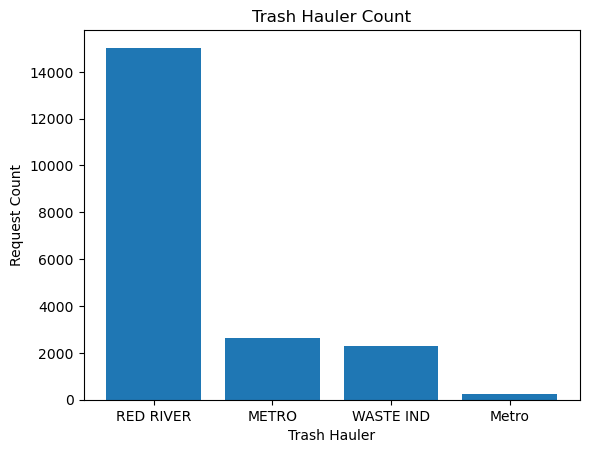

In [31]:
#Trash hauler count
trash_hauler_counts=trash_pickup['trash_hauler'].value_counts()
plt.bar(trash_hauler_counts.index, request_counts.values)
plt.xlabel('Trash Hauler')
plt.ylabel('Request Count')
plt.title('Trash Hauler Count')

__What were the total missed pickup by route?__

In [39]:
trash_pickup.groupby('trash_route')['request'].count()

trash_route
1201     179
1202     104
1202S      4
1203      81
1204      77
        ... 
9504      59
9505      70
9506      77
9507      92
9508     140
Name: request, Length: 173, dtype: int64

__Are there any geospatial analysis you can do?  Which visualizations can you create?__

In [44]:
#geometry = 
geometry=gpd.points_from_xy(trash_pickup['longitude'], trash_pickup['latitude'])

In [47]:
trash_pickup_gdf=gpd.GeoDataFrame(trash_pickup, geometry=geometry, crs="EPSG:4326")

In [73]:
trash_pickup_gdf.head()

,request_number,date_opened,request,description,incident_address,zip_code,trash_hauler,trash_route,council_district,state_plan_x,state_plan_y,longitude,latitude,year,month,day,geometry
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,2017,11,1,POINT (-86.81539 36.21729)
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,2017,11,1,POINT (-86.83810 36.21347)
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,2017,11,1,POINT (-86.88556 36.14292)
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,2017,11,1,POINT (-86.78917 36.21265)
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,2017,11,1,POINT (-86.87499 36.15486)


In [56]:
#trash route count by zip code
trash_route_byzip = trash_pickup.groupby('zip_code')['trash_route'].count()

In [59]:
type(trash_pickup_gdf)

geopandas.geodataframe.GeoDataFrame

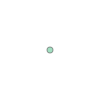

In [60]:
trash_pickup_gdf.loc[0, 'geometry']

In [61]:
print(trash_pickup_gdf.loc[0, 'geometry'])

POINT (-86.81539226 36.21729166)


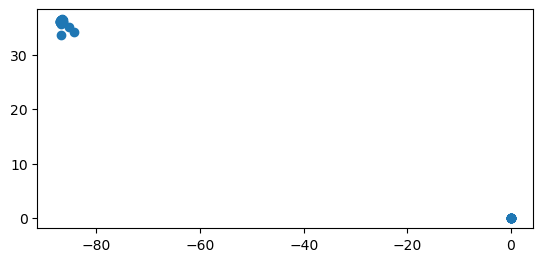

In [62]:
trash_pickup_gdf.plot();